In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
info = pd.read_csv('snp_info.csv')
info.head()

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.0546,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.1567,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.2892,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.8749,53826064
4,SNP_05,BovineHD0600017032,6,80.5015,61779512


In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [98]:
train_df

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
train_1 = train_df.copy()
train_1.drop(['father', 'mother', 'gender'], axis = 1, inplace = True)

In [119]:
train_df['SNP_05'].str.replace(' ', '')

0      CA
1      AA
2      CC
3      AA
4      CC
       ..
257    CC
258    AA
259    AA
260    AA
261    CC
Name: SNP_05, Length: 262, dtype: object

In [122]:
train_df.apply(lambda v : v.str.replace(' ', ''), axis = 1)
train_df.apply(lambda v : v.str.split(' '), axis = 1)

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,[TRAIN_000],NaN,NaN,NaN,NaN,"[G, G]","[A, G]","[A, A]","[G, A]","[C, A]",...,"[A, A]","[G, G]","[A, A]","[G, G]","[A, G]","[A, A]","[A, A]","[A, A]","[A, A]",[B]
1,[TRAIN_001],NaN,NaN,NaN,NaN,"[A, G]","[A, G]","[C, A]","[A, A]","[A, A]",...,"[A, A]","[G, A]","[A, A]","[A, G]","[A, A]","[G, A]","[G, G]","[A, A]","[A, A]",[C]
2,[TRAIN_002],NaN,NaN,NaN,NaN,"[G, G]","[G, G]","[A, A]","[G, A]","[C, C]",...,"[A, A]","[G, A]","[G, A]","[A, G]","[A, A]","[A, A]","[A, A]","[A, A]","[A, A]",[B]
3,[TRAIN_003],NaN,NaN,NaN,NaN,"[A, A]","[G, G]","[A, A]","[G, A]","[A, A]",...,"[G, G]","[A, A]","[G, G]","[A, G]","[G, G]","[G, G]","[G, G]","[A, A]","[G, G]",[A]
4,[TRAIN_004],NaN,NaN,NaN,NaN,"[G, G]","[G, G]","[C, C]","[A, A]","[C, C]",...,"[A, A]","[A, A]","[A, A]","[G, G]","[A, A]","[A, A]","[A, G]","[A, A]","[G, A]",[C]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,[TRAIN_257],NaN,NaN,NaN,NaN,"[A, G]","[A, G]","[A, A]","[G, A]","[C, C]",...,"[A, A]","[G, A]","[A, A]","[G, G]","[A, G]","[G, A]","[A, A]","[A, A]","[A, A]",[B]
258,[TRAIN_258],NaN,NaN,NaN,NaN,"[G, G]","[A, A]","[C, A]","[A, A]","[A, A]",...,"[G, A]","[G, A]","[A, A]","[A, G]","[A, G]","[A, A]","[A, G]","[A, A]","[G, A]",[C]
259,[TRAIN_259],NaN,NaN,NaN,NaN,"[A, G]","[G, G]","[A, A]","[G, A]","[A, A]",...,"[G, G]","[G, A]","[G, A]","[A, A]","[G, G]","[G, G]","[G, G]","[C, A]","[G, G]",[A]
260,[TRAIN_260],NaN,NaN,NaN,NaN,"[A, A]","[G, G]","[A, A]","[G, A]","[A, A]",...,"[G, G]","[A, A]","[G, A]","[A, G]","[A, G]","[G, A]","[G, G]","[C, A]","[G, G]",[A]


In [135]:
new_train = train_df.copy()
new_train = new_train.drop(['id', 'father', 'mother', 'gender', 'trait', 'class'], axis =1)
new_train = new_train.apply(lambda v : v.str.split(' '), axis = 1)
new_train.head()

,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,"[G, G]","[A, G]","[A, A]","[G, A]","[C, A]","[A, A]","[A, A]","[G, G]","[A, A]","[G, G]","[A, G]","[A, A]","[A, A]","[A, A]","[A, A]"
1,"[A, G]","[A, G]","[C, A]","[A, A]","[A, A]","[A, G]","[A, A]","[G, A]","[A, A]","[A, G]","[A, A]","[G, A]","[G, G]","[A, A]","[A, A]"
2,"[G, G]","[G, G]","[A, A]","[G, A]","[C, C]","[G, G]","[A, A]","[G, A]","[G, A]","[A, G]","[A, A]","[A, A]","[A, A]","[A, A]","[A, A]"
3,"[A, A]","[G, G]","[A, A]","[G, A]","[A, A]","[G, G]","[G, G]","[A, A]","[G, G]","[A, G]","[G, G]","[G, G]","[G, G]","[A, A]","[G, G]"
4,"[G, G]","[G, G]","[C, C]","[A, A]","[C, C]","[A, A]","[A, A]","[A, A]","[A, A]","[G, G]","[A, A]","[A, A]","[A, G]","[A, A]","[G, A]"


In [186]:
for i in range(len(new_train)):
    d = pd.DataFrame(new_train.loc[i:i])
    print(d)

   SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  SNP_09  \
0  [G, G]  [A, G]  [A, A]  [G, A]  [C, A]  [A, A]  [A, A]  [G, G]  [A, A]   

   SNP_10  SNP_11  SNP_12  SNP_13  SNP_14  SNP_15  
0  [G, G]  [A, G]  [A, A]  [A, A]  [A, A]  [A, A]  
   SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  SNP_09  \
1  [A, G]  [A, G]  [C, A]  [A, A]  [A, A]  [A, G]  [A, A]  [G, A]  [A, A]   

   SNP_10  SNP_11  SNP_12  SNP_13  SNP_14  SNP_15  
1  [A, G]  [A, A]  [G, A]  [G, G]  [A, A]  [A, A]  
   SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  SNP_09  \
2  [G, G]  [G, G]  [A, A]  [G, A]  [C, C]  [G, G]  [A, A]  [G, A]  [G, A]   

   SNP_10  SNP_11  SNP_12  SNP_13  SNP_14  SNP_15  
2  [A, G]  [A, A]  [A, A]  [A, A]  [A, A]  [A, A]  
   SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  SNP_09  \
3  [A, A]  [G, G]  [A, A]  [G, A]  [A, A]  [G, G]  [G, G]  [A, A]  [G, G]   

   SNP_10  SNP_11  SNP_12  SNP_13  SNP_14  SNP_15  
3  [A, G]  [G, G

In [124]:
new_train = train_df.drop(['id', 'father', 'mother', 'gender', 'trait'], axis =1)
new_train = train_df.apply(lambda v : v.str.split(' '), axis = 1)

for i in range(len(new_train.columns)):
    G = 0
    A = 0
    data = []
    if new_train[str(new_train.columns[i])][0] == G:
        G += 1
    else:
        A += 1
    data.append([G, A])

In [125]:
data

[[0, 1]]

In [101]:
train_1 = train_df.copy()
train_1.drop(['father', 'mother', 'gender'], axis = 1, inplace = True)

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B


In [107]:
train_df.SNP_01[0].replace(' ', '')

'GG'

In [105]:
''.join(train_df.SNP_01)

'G GA GG GA AG GG GG GG GG GG GG GG GG GA GG GA AA AA GA AG GG GG GA AG GG GG GG GG GG GA GG GA AG GA GA AA AG GA AG GG GG GG GG GA AG GG GG GA AG GA AA AG GA AG GG GG GA AA AG GA AG GA AA AA GA GA AG GA AG GG GA GA GA AA GG GA GG GG GG GA AA GG GA GA GG GA AG GG GG GG GG GG GG GG GG GG GA GA AA GA GA GG GA GG GA AA GG GG GG GA GG GG GA GA GG GG GG GA AA GA GG GG GG GA GA AG GG GA AG GG GG GA AG GG GA AG GA GA AA AG GG GG GA GA GG GA GA GA GA GG GG GA GG GA GA GA AG GG GG GG GA GA AG GA GG GG GG GA AG GG GA GA GA GG GG GG GG GA AA GA GA AG GA AA GA GA GA GG GG GG GG GG GG GG GA AG GA GG GG GG GA GG GA AG GA AA GG GG GG GA GG GA GA AA AG GA GA GA GG GG GA GA GG GG GA GG GG GG GA GA AG GG GA GG GG GG GA GA AA GA AA AA GG GA GG GG GA GG GA GG GA GG GG GA AA GA GG GA GG GA GA AG G'

In [21]:
train_df.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

전처리

lgbm 중요변수 원핫인코딩 하면 성능 높아짐

In [76]:
y_train = train_df.iloc[:,-1]

In [77]:
x_train = train_df.iloc[:,4:-1]

In [78]:
x_test = test_df.iloc[:,4:]

In [79]:
lbe = LabelEncoder()
for i in list(x_train.columns):
    lbe.fit(x_train[i])
    x_train[i]=lbe.transform(x_train[i])
    x_test[i]=lbe.transform(x_test[i])

In [80]:
ohe = OneHotEncoder()
x_train['trait'] = x_train['trait'].astype('category')
x_test['trait'] = x_test['trait'].astype('category')
x_train['SNP_01'] = x_train['SNP_01'].astype('category')
x_test['SNP_01'] = x_test['SNP_01'].astype('category')
x_train['SNP_02'] = x_train['SNP_02'].astype('category')
x_test['SNP_02'] = x_test['SNP_02'].astype('category')
x_train['SNP_03'] = x_train['SNP_03'].astype('category')
x_test['SNP_03'] = x_test['SNP_03'].astype('category')
x_train['SNP_04'] = x_train['SNP_04'].astype('category')
x_test['SNP_04'] = x_test['SNP_04'].astype('category')
x_train['SNP_05'] = x_train['SNP_05'].astype('category')
x_test['SNP_05'] = x_test['SNP_05'].astype('category')
x_train['SNP_06'] = x_train['SNP_06'].astype('category')
x_test['SNP_06'] = x_test['SNP_06'].astype('category')
x_train['SNP_07'] = x_train['SNP_07'].astype('category')
x_test['SNP_07'] = x_test['SNP_07'].astype('category')
x_train['SNP_08'] = x_train['SNP_08'].astype('category')
x_test['SNP_08'] = x_test['SNP_08'].astype('category')
x_train['SNP_09'] = x_train['SNP_09'].astype('category')
x_test['SNP_09'] = x_test['SNP_09'].astype('category')
x_train['SNP_10'] = x_train['SNP_10'].astype('category')
x_test['SNP_10'] = x_test['SNP_10'].astype('category')
x_train['SNP_11'] = x_train['SNP_11'].astype('category')
x_test['SNP_11'] = x_test['SNP_11'].astype('category')
x_train['SNP_12'] = x_train['SNP_12'].astype('category')
x_test['SNP_12'] = x_test['SNP_12'].astype('category')
x_train['SNP_13'] = x_train['SNP_13'].astype('category')
x_test['SNP_13'] = x_test['SNP_13'].astype('category')
x_train['SNP_14'] = x_train['SNP_14'].astype('category')
x_test['SNP_14'] = x_test['SNP_14'].astype('category')
x_train['SNP_15'] = x_train['SNP_15'].astype('category')
x_test['SNP_15'] = x_test['SNP_15'].astype('category')
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [81]:
lbe = LabelEncoder()
y = lbe.fit(y_train)
y = lbe.transform(y_train)
y

array([1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1])

### 모델링

##### XGBoost

In [82]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
model.fit(x_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [83]:
x_test['cluster'] = model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score

answer = pd.read_csv('./answer.csv')
answer['predict'] = x_test['cluster']
accuracy_score(answer['class'], answer['predict'])

0.0

In [85]:
answer

,id,class,predict
0,TEST_000,A,0
1,TEST_001,B,1
2,TEST_002,C,2
3,TEST_003,C,1
4,TEST_004,A,0
...,...,...,...
170,TEST_170,B,1
171,TEST_171,C,2
172,TEST_172,C,2
173,TEST_173,B,1


#### k-means

In [86]:
for i in range(len(x_test['cluster'])):
    if x_test['cluster'][i] == 0:
        x_test['cluster'][i] = 'A'
    elif x_test['cluster'][i] == 1:
        x_test['cluster'][i] = 'B'
    else:
        x_test['cluster'][i] = 'C'

In [87]:
from sklearn.metrics import accuracy_score

answer = pd.read_csv('./answer.csv')
answer['predict'] = x_test['cluster']
accuracy_score(answer['class'], answer['predict'])

0.96

In [88]:
answer

,id,class,predict
0,TEST_000,A,A
1,TEST_001,B,B
2,TEST_002,C,C
3,TEST_003,C,B
4,TEST_004,A,A
...,...,...,...
170,TEST_170,B,B
171,TEST_171,C,C
172,TEST_172,C,C
173,TEST_173,B,B


In [89]:
data

,score
SNP_08_1,224.0
SNP_15_0,198.0
SNP_11_0,196.0
SNP_02_0,163.0
SNP_04_0,161.0
SNP_08_2,154.0
SNP_05_0,140.0
SNP_15_1,130.0
SNP_02_2,103.0
SNP_12_0,98.0


<AxesSubplot: >

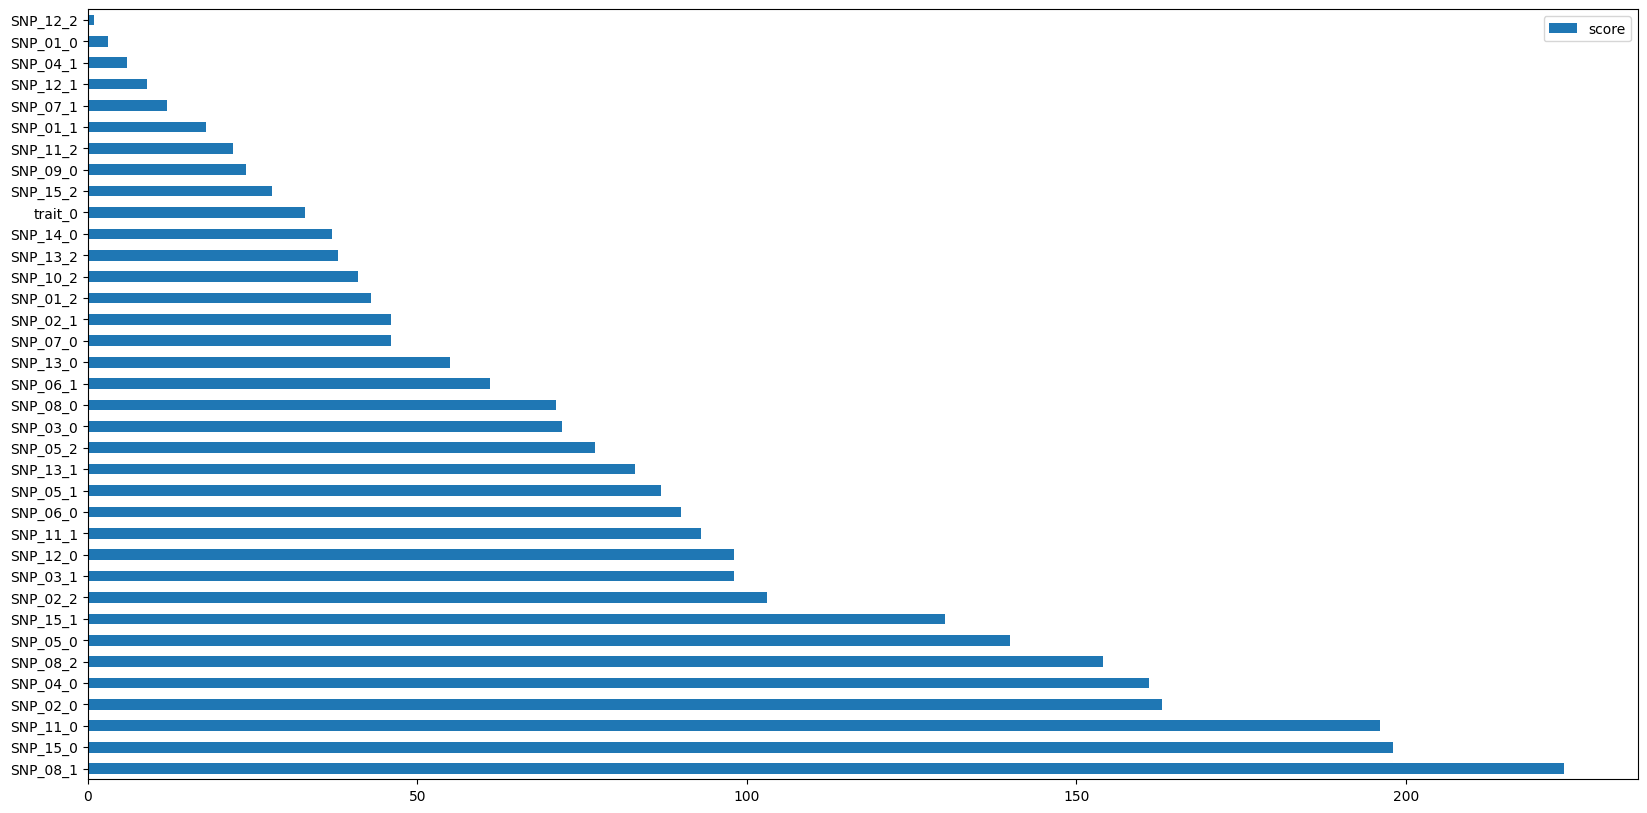

In [90]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [91]:
x_train.drop(['SNP_12_2', 'SNP_01_0', 'SNP_04_1', 'SNP_12_1', 'SNP_07_1', 
              'SNP_01_1', 'SNP_11_2', 'SNP_09_0', 'SNP_15_2', 'trait_0', 'SNP_14_0', 'SNP_13_2', 'SNP_10_2', 'SNP_01_2'], axis = 1, inplace = True)
x_test.drop(['SNP_12_2', 'SNP_01_0', 'SNP_04_1', 'SNP_12_1', 'SNP_07_1', 
              'SNP_01_1', 'SNP_11_2', 'SNP_09_0', 'SNP_15_2', 'trait_0', 'SNP_14_0', 'cluster', 'SNP_13_2', 'SNP_10_2', 'SNP_01_2'], axis = 1,  inplace = True)

In [92]:
model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
model.fit(x_train, y)
model.predict(x_test)

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1])

In [93]:
x_test['cluster'] = model.predict(x_test)

In [94]:
x_test.cluster

0      0
1      1
2      2
3      1
4      0
      ..
170    1
171    2
172    2
173    1
174    1
Name: cluster, Length: 175, dtype: int64

In [95]:
for i in range(len(x_test['cluster'])):
    if x_test['cluster'][i] == 0:
        x_test['cluster'][i] = 'A'
    elif x_test['cluster'][i] == 1:
        x_test['cluster'][i] = 'B'
    else:
        x_test['cluster'][i] = 'C'

In [96]:
answer

,id,class,predict
0,TEST_000,A,A
1,TEST_001,B,B
2,TEST_002,C,C
3,TEST_003,C,B
4,TEST_004,A,A
...,...,...,...
170,TEST_170,B,B
171,TEST_171,C,C
172,TEST_172,C,C
173,TEST_173,B,B


In [97]:
from sklearn.metrics import accuracy_score

answer = pd.read_csv('./answer.csv')
answer['predict'] = x_test['cluster']
accuracy_score(answer['class'], answer['predict'])

0.9771428571428571